# Web Scraping Project

In [1]:
import requests
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup

## Exercise 2: Download HTML ✓

In [2]:
url = "https://books.toscrape.com/"
response = requests.get(url)
if response.status_code == 200:
    print("Todo ok")
else:
    print("Todo mal")

Todo ok


## Exercise 3: Transforms the HTML and cleaning the values✓

In [3]:
books_table = []

# Content parsing
soup = BeautifulSoup(response.content)

# Tags filtering for title, price, if it is in stock and the start rating:

# Filter:
# Finds all the lists with class="the values that I'm looking for"
books_items = soup.find_all('li', class_="col-xs-6 col-sm-4 col-md-3 col-lg-3" )

# To get the book information like Title, Price, Availability and the Stars rating(in str):
for books in books_items:
    raw_title = books.find('h3').find('a')  # Finds the book title
    title_tag = raw_title.text.strip()

    raw_price = books.find('p', class_='price_color')  # Finds the book price
    total_price = raw_price.text.strip().replace('£','')  # Returns the price in clean format

    availability_tag = books.find('p', class_="instock availability") # Finds the book availability
    availability = availability_tag.text.strip()  # Returns the stock in clean format

    starts_tag = books.find('p', class_='star-rating')
    rating = ''
    # Finds a <p> tag with class=star-rating, get all its class names, and the second part is the rating(stars) like 'Three'
    if starts_tag:
        classes = starts_tag.get('class')
        rating = classes[1]

    books_table.append({'Title': title_tag,
                        'Price': total_price,
                        'Availability': availability,
                        'Rating': rating})

## Exercise 4: Process the DataFrame (Creation of df)

In [4]:
df = pd.DataFrame(books_table)
df.head()
#df.tail()

,Title,Price,Availability,Rating
0,A Light in the ...,51.77,In stock,Three
1,Tipping the Velvet,53.74,In stock,One
2,Soumission,50.10,In stock,One
3,Sharp Objects,47.82,In stock,Four
4,Sapiens: A Brief History ...,54.23,In stock,Five


## Exercise 5: Storing data in SQL

In [5]:
# Connections
conn = sqlite3.connect('books.db') # Creates the connection and the file
cursor = conn.cursor()  # To be able to run commands

# Table Creation
cursor.execute('''CREATE TABLE IF NOT EXISTS Books(Title TEXT,
                                                   Price REAL,
                                                   Availability TEXT,
                                                   Rating TEXT)''')

df.to_sql('Books', conn, if_exists='append', index=False)

20

In [6]:
# Commiting changes and closing the connection
conn.commit()
conn.close()

## Exercise 6: Visualization

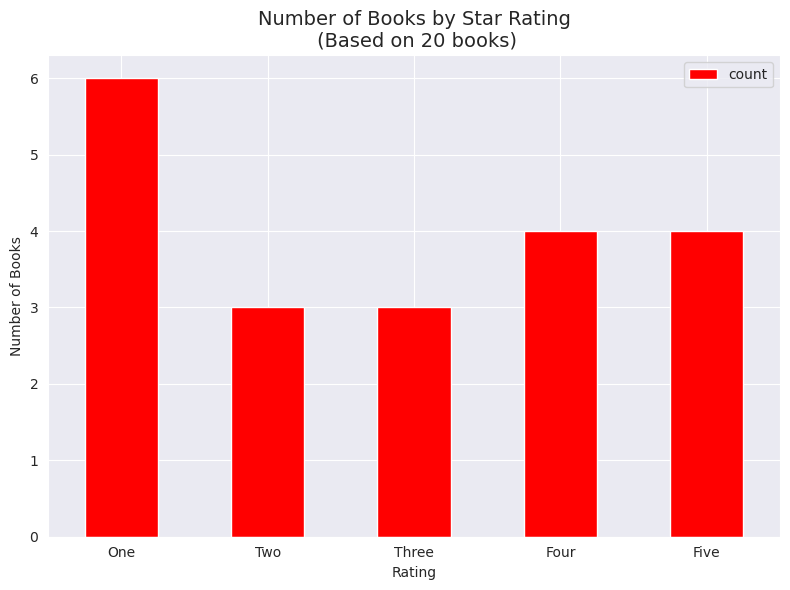

In [7]:
star_order = ['One', 'Two', 'Three', 'Four', 'Five']  # To indicate the index order
# Selects the "ratings" to plot them, counts the values in the rating and then sorts the index by the pre-defined order
rating_counts = df['Rating'].value_counts().reindex(star_order)

plt.figure(figsize=(8,6))
rating_counts.plot(kind='bar', color='red')  # Plots a Bar chart
plt.title('Number of Books by Star Rating\n (Based on 20 books)', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Number of Books')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend()
plt.show()